# Mapping data to the Self-organizing Map

In this tutorial we present the procedure of mapping data to a trained SOM.

First the trained SOM will be loaded:

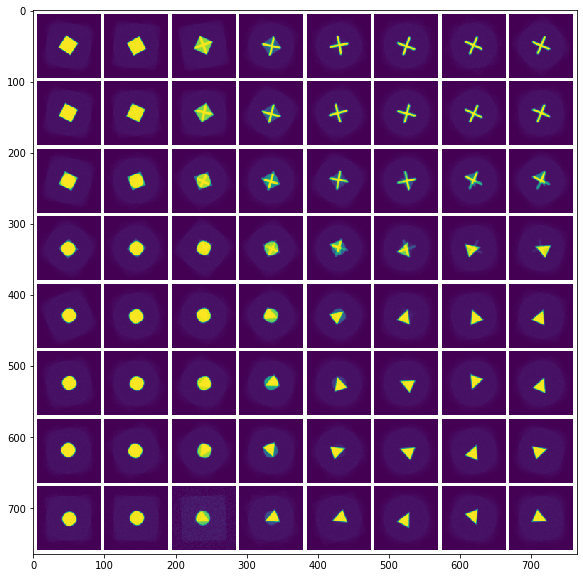

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pink
import tools

np_som = np.load("data/som-shapes-cartesian2d-8x8.npy")
som = pink.som(np_som)

fig = plt.figure(figsize=(10,10))
plt.imshow(tools.show(som, border=5))

Load data image, which should be mapped.

shape:      (64, 64)
min value:  4.5595434e-06
max value:  1.0


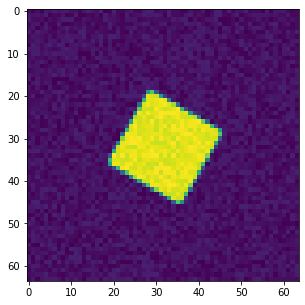

In [2]:
image = np.load("data/shapes/boxes.npy").astype(np.float32)[0]
#image = np.load("data/shapes/circles.npy").astype(np.float32)[0]
#image = np.load("data/shapes/crosses.npy").astype(np.float32)[0]
#image = np.load("data/shapes/triangles.npy").astype(np.float32)[0]
image /= np.amax(image)

fig = plt.figure(figsize=(5,5))
plt.imshow(image)

print('shape:     ', image.shape)
print('min value: ', np.amin(image))
print('max value: ', np.amax(image))

The Mapper is calculating the euclidean distance to each neuron, which indicate the similarity to each neuron. The second return value gives the transformation operation index for the best similarity. The storage order is identical to the SOM.

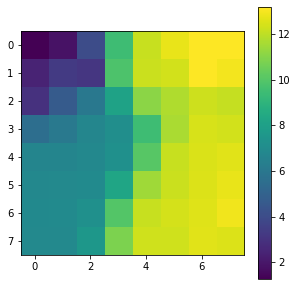

In [3]:
number_of_rotations = 360

mapper = pink.Mapper(som, number_of_rotations=number_of_rotations)
euclidean_distances, transformations = mapper(pink.data(image))

heatmap = np.array(euclidean_distances).reshape(8, 8)

fig = plt.figure(figsize=(5,5))
plt.imshow(heatmap)
plt.colorbar()

The second return value gives the transformation operation index for the best similarity.

In [4]:
print(np.array(transformations).reshape(8, 8))

[[233 465 194 504 151 474 654 384]
 [193 193 408 492 222 492 474 654]
 [286 468 564 567 691  54 654 655]
 [629  54 136 491 671 311 581  41]
 [408 498 408 226 593 311 491 311]
 [408  46 498 408 491  44 131 311]
 [232 228 138 671 581  41 311 581]
 [498 138 228 404 401 318 671 221]]


From the transformation index the information if the image was flipped can be extracted by checking if the it is larger or equal than the number of rotations ...

In [5]:
is_flipped = (np.array(transformations).reshape(8, 8) >= number_of_rotations)
print(is_flipped)

[[False  True False  True False  True  True  True]
 [False False  True  True False  True  True  True]
 [False  True  True  True  True False  True  True]
 [ True False False  True  True False  True False]
 [ True  True  True False  True False  True False]
 [ True False  True  True  True False False False]
 [False False False  True  True False False  True]
 [ True False False  True  True False  True False]]


... and the rotation angle in radian by multiplication with 2 * pi / the number of rotations.

In [6]:
import math

rotation_angle = ((np.array(transformations).reshape(8, 8) - is_flipped * number_of_rotations)
               * 2 * math.pi / number_of_rotations)
np.set_printoptions(precision=2)
print(rotation_angle)

[[4.07 1.83 3.39 2.51 2.64 1.99 5.13 0.42]
 [3.37 3.37 0.84 2.3  3.87 2.3  1.99 5.13]
 [4.99 1.88 3.56 3.61 5.78 0.94 5.13 5.15]
 [4.69 0.94 2.37 2.29 5.43 5.43 3.86 0.72]
 [0.84 2.41 0.84 3.94 4.07 5.43 2.29 5.43]
 [0.84 0.8  2.41 0.84 2.29 0.77 2.29 5.43]
 [4.05 3.98 2.41 5.43 3.86 0.72 5.43 3.86]
 [2.41 2.41 3.98 0.77 0.72 5.55 5.43 3.86]]
